In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)

In [4]:
saved_style_state = matplotlib.rcParams.copy() 

In [5]:
if os.path.isfile("Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States copy.csv"):
    filepath = "Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States copy.csv"
    print("loading from file")
else:
    filepath = "https://data.cdc.gov/api/views/9j2v-jamp/rows.csv?accessType=DOWNLOAD"
    print("loading from the internet")

suiciderate_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [20]:
suiciderate_data.sample(8)

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
2406,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 35-44 years,3.232,2017,41,35-44 years,3.2,8.5,NaN
4249,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race",5,Female: Black or African American: 45-64 years,5.224,2012,36,45-64 years,4.0,2.4,NaN
2513,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 55-64 years,3.242,1998,22,55-64 years,4.2,5.5,NaN
3447,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race",5,Male: Black or African American: 45-64 years,5.124,2008,32,45-64 years,4.0,9.8,NaN
5755,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin",7,Male: Hispanic or Latino: All races: 65 years ...,7.135,1984,8,65 years and over,5.0,NaN,...
5367,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin",7,Male: Not Hispanic or Latino: White: 25-44 years,7.113,2016,40,25-44 years,3.0,33.5,NaN
1391,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,75-84 years,1.520,2010,34,75-84 years,5.2,15.7,NaN
3760,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race",5,Male: American Indian or Alaska Native: 65 yea...,5.135,1984,8,65 years and over,5.0,NaN,...


In [27]:
def get_start_age(value):
    if value == "All ages":
        return 0
    value = value.split("years")[0]
    value = value.split("-")[0]
    return int(value)

def get_end_age(value):
    value = value.split("years")[0]
    try:
        value = value.split("-")[1]
    except:
        value = 120
    return int(value)

suiciderate_data["age_start"] = suiciderate_data.AGE.apply(get_start_age)
suiciderate_data["age_end"] = suiciderate_data.AGE.apply(get_end_age)
suiciderate_data.sample(8)

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,age_start,age_end
1193,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,45-54 years,1.410,1980,4,45-54 years,4.1,15.9,NaN,45,54
2378,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 35-44 years,3.232,1989,13,35-44 years,3.2,6.7,NaN,35,44
4253,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race",5,Female: Black or African American: 45-64 years,5.224,2016,40,45-64 years,4.0,2.3,NaN,45,64
993,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,20-24 years,1.220,1990,14,20-24 years,2.2,15.1,NaN,20,24
167,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.110,2018,42,All ages,0.0,25.5,NaN,0,120
768,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,6,Female: Not Hispanic or Latino: American India...,6.240,2011,35,All ages,0.0,7.9,NaN,0,120
3456,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race",5,Male: Black or African American: 45-64 years,5.124,2017,41,45-64 years,4.0,10.4,NaN,45,64
3789,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race",5,Male: American Indian or Alaska Native: 65 yea...,5.135,2013,37,65 years and over,5.0,NaN,*,65,120


In [69]:
all_persons = suiciderate_data[suiciderate_data.STUB_LABEL == "All persons"]#.ESTIMATE.plot()
all_persons 
allpersons_1 = all_persons[all_persons.UNIT_NUM == 1]
allpersons_1

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,age_start,age_end
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN,0,120
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN,0,120
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN,0,120
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN,0,120
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN,0,120
5,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1982,6,All ages,0.0,12.5,NaN,0,120
6,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1983,7,All ages,0.0,12.4,NaN,0,120
7,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1984,8,All ages,0.0,12.6,NaN,0,120
8,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1985,9,All ages,0.0,12.5,NaN,0,120
9,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1986,10,All ages,0.0,13.0,NaN,0,120


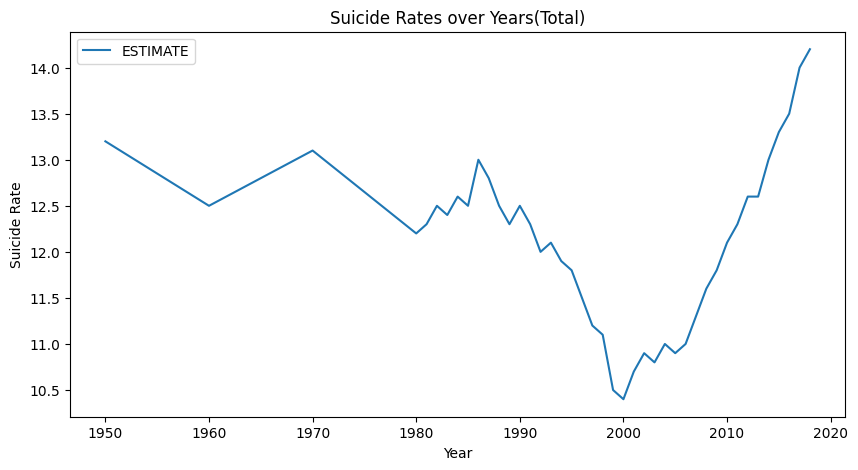

In [114]:
allpersons_1.plot(x='YEAR', y='ESTIMATE')
plt.title('Suicide Rates over Years(Total)')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [75]:
male_suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Male"]#.ESTIMATE.plot()
male_suiciderate
malesuiciderate_1 = male_suiciderate[male_suiciderate.UNIT_NUM == 1]
malesuiciderate_1
male_suiciderate_allages = malesuiciderate_1[malesuiciderate_1.AGE == "All ages"]
male_suiciderate_allages

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,age_start,age_end
42,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,2.1,1950,1,All ages,0.0,21.2,NaN,0,120
43,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,2.1,1960,2,All ages,0.0,20.0,NaN,0,120
44,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,2.1,1970,3,All ages,0.0,19.8,NaN,0,120
45,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,2.1,1980,4,All ages,0.0,19.9,NaN,0,120
46,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,2.1,1981,5,All ages,0.0,19.8,NaN,0,120
47,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,2.1,1982,6,All ages,0.0,20.4,NaN,0,120
48,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,2.1,1983,7,All ages,0.0,20.4,NaN,0,120
49,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,2.1,1984,8,All ages,0.0,20.9,NaN,0,120
50,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,2.1,1985,9,All ages,0.0,21.1,NaN,0,120
51,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Male,2.1,1986,10,All ages,0.0,21.9,NaN,0,120


<Axes: xlabel='YEAR'>

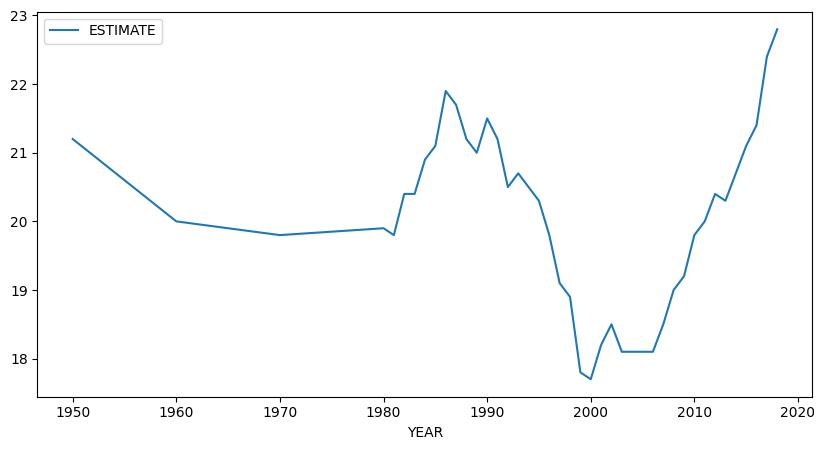

In [85]:
male_suiciderate_allages.plot(x='YEAR', y='ESTIMATE')

In [89]:
female_suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Female"]#.ESTIMATE.plot()
female_suiciderate
femalesuiciderate_1 = female_suiciderate[female_suiciderate.UNIT_NUM == 1]
femalesuiciderate_1
female_suiciderate_allages = femalesuiciderate_1[femalesuiciderate_1.AGE == "All ages"]
female_suiciderate_allages

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,age_start,age_end
84,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Female,2.2,1950,1,All ages,0.0,5.6,NaN,0,120
85,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Female,2.2,1960,2,All ages,0.0,5.6,NaN,0,120
86,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Female,2.2,1970,3,All ages,0.0,7.4,NaN,0,120
87,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Female,2.2,1980,4,All ages,0.0,5.7,NaN,0,120
88,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Female,2.2,1981,5,All ages,0.0,6.0,NaN,0,120
89,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Female,2.2,1982,6,All ages,0.0,5.8,NaN,0,120
90,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Female,2.2,1983,7,All ages,0.0,5.5,NaN,0,120
91,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Female,2.2,1984,8,All ages,0.0,5.6,NaN,0,120
92,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Female,2.2,1985,9,All ages,0.0,5.2,NaN,0,120
93,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,2,Female,2.2,1986,10,All ages,0.0,5.5,NaN,0,120


<Axes: xlabel='YEAR'>

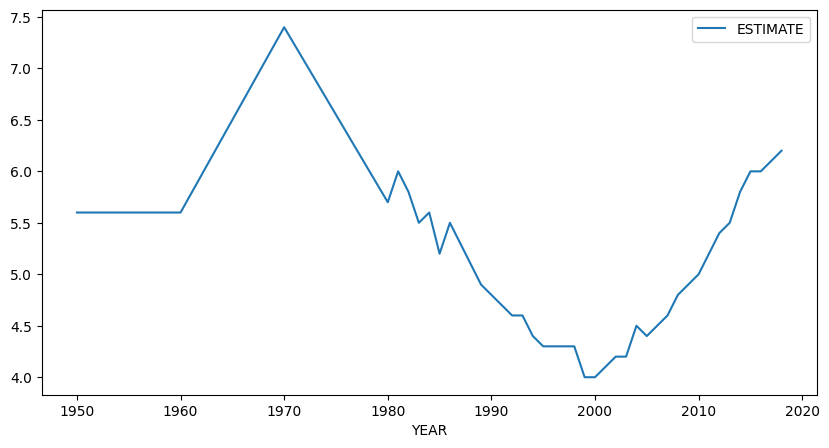

In [90]:
female_suiciderate_allages.plot(x='YEAR', y='ESTIMATE')

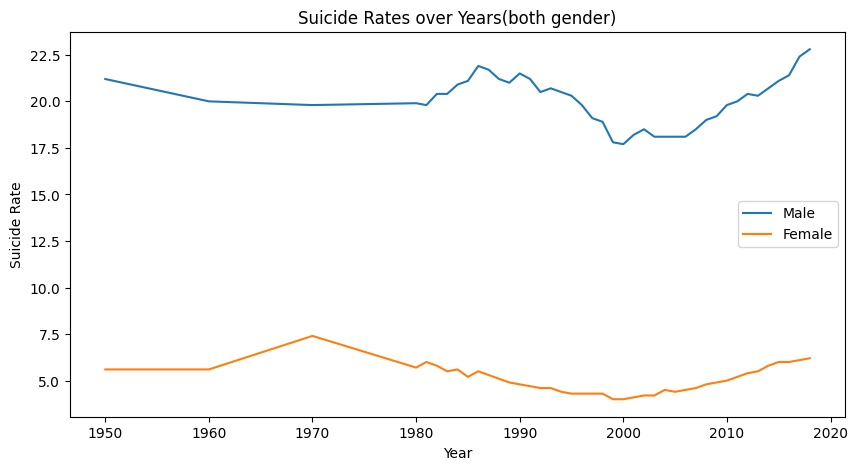

In [112]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure()

# Plot male suicide rates over years
plt.plot(male_suiciderate_allages['YEAR'], male_suiciderate_allages['ESTIMATE'], label="Male")

# Plot female suicide rates over years
plt.plot(female_suiciderate_allages['YEAR'], female_suiciderate_allages['ESTIMATE'], label="Female")

# Adding labels and title
plt.title('Suicide Rates over Years(both gender)')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


In [96]:
whitemale_suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Male: White"]#.ESTIMATE.plot()
whitemale_suiciderate
whitemalesuiciderate_1 = whitemale_suiciderate[whitemale_suiciderate.UNIT_NUM == 1]
whitemalesuiciderate_1
whitemale_suiciderate_allages = whitemalesuiciderate_1[whitemalesuiciderate_1.AGE == "All ages"]
whitemale_suiciderate_allages

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,age_start,age_end
126,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.11,1950,1,All ages,0.0,22.3,NaN,0,120
127,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.11,1960,2,All ages,0.0,21.1,NaN,0,120
128,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.11,1970,3,All ages,0.0,20.8,NaN,0,120
129,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.11,1980,4,All ages,0.0,20.9,NaN,0,120
130,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.11,1981,5,All ages,0.0,20.9,NaN,0,120
131,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.11,1982,6,All ages,0.0,21.6,NaN,0,120
132,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.11,1983,7,All ages,0.0,21.6,NaN,0,120
133,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.11,1984,8,All ages,0.0,22.1,NaN,0,120
134,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.11,1985,9,All ages,0.0,22.4,NaN,0,120
135,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.11,1986,10,All ages,0.0,23.2,NaN,0,120


In [98]:
blackmale_suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Male: Black or African American"]
blackmalesuiciderate_1 = blackmale_suiciderate[blackmale_suiciderate.UNIT_NUM == 1]
blackmalesuiciderate_1
blackmale_suiciderate_allages =blackmalesuiciderate_1[blackmalesuiciderate_1.AGE == "All ages"]
blackmale_suiciderate_allages

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,age_start,age_end
168,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1950,1,All ages,0.0,7.5,NaN,0,120
169,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1960,2,All ages,0.0,8.4,NaN,0,120
170,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1970,3,All ages,0.0,10.0,NaN,0,120
171,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1980,4,All ages,0.0,11.4,NaN,0,120
172,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1981,5,All ages,0.0,11.4,NaN,0,120
173,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1982,6,All ages,0.0,11.2,NaN,0,120
174,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1983,7,All ages,0.0,11.1,NaN,0,120
175,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1984,8,All ages,0.0,11.7,NaN,0,120
176,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1985,9,All ages,0.0,11.8,NaN,0,120
177,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.12,1986,10,All ages,0.0,12.2,NaN,0,120


In [99]:
nativemale_suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Male: American Indian or Alaska Native"]
nativemalesuiciderate_1 = nativemale_suiciderate[nativemale_suiciderate.UNIT_NUM == 1]
nativemalesuiciderate_1
nativemale_suiciderate_allages =nativemalesuiciderate_1[nativemalesuiciderate_1.AGE == "All ages"]
nativemale_suiciderate_allages

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,age_start,age_end
210,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: American Indian or Alaska Native,4.13,1950,1,All ages,0.0,NaN,...,0,120
211,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: American Indian or Alaska Native,4.13,1960,2,All ages,0.0,NaN,...,0,120
212,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: American Indian or Alaska Native,4.13,1970,3,All ages,0.0,NaN,...,0,120
213,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: American Indian or Alaska Native,4.13,1980,4,All ages,0.0,19.3,NaN,0,120
214,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: American Indian or Alaska Native,4.13,1981,5,All ages,0.0,21.6,NaN,0,120
215,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: American Indian or Alaska Native,4.13,1982,6,All ages,0.0,18.6,NaN,0,120
216,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: American Indian or Alaska Native,4.13,1983,7,All ages,0.0,20.7,NaN,0,120
217,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: American Indian or Alaska Native,4.13,1984,8,All ages,0.0,18.0,NaN,0,120
218,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: American Indian or Alaska Native,4.13,1985,9,All ages,0.0,17.9,NaN,0,120
219,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: American Indian or Alaska Native,4.13,1986,10,All ages,0.0,20.7,NaN,0,120


In [100]:
asianmale_suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Male: Asian or Pacific Islander"]
asianmalesuiciderate_1 = asianmale_suiciderate[asianmale_suiciderate.UNIT_NUM == 1]
asianmalesuiciderate_1
asianmale_suiciderate_allages =asianmalesuiciderate_1[asianmalesuiciderate_1.AGE == "All ages"]
asianmale_suiciderate_allages

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,age_start,age_end
252,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.14,1950,1,All ages,0.0,NaN,...,0,120
253,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.14,1960,2,All ages,0.0,NaN,...,0,120
254,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.14,1970,3,All ages,0.0,NaN,...,0,120
255,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.14,1980,4,All ages,0.0,10.7,NaN,0,120
256,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.14,1981,5,All ages,0.0,9.3,NaN,0,120
257,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.14,1982,6,All ages,0.0,8.7,NaN,0,120
258,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.14,1983,7,All ages,0.0,9.5,NaN,0,120
259,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.14,1984,8,All ages,0.0,9.7,NaN,0,120
260,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.14,1985,9,All ages,0.0,9.3,NaN,0,120
261,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.14,1986,10,All ages,0.0,9.4,NaN,0,120


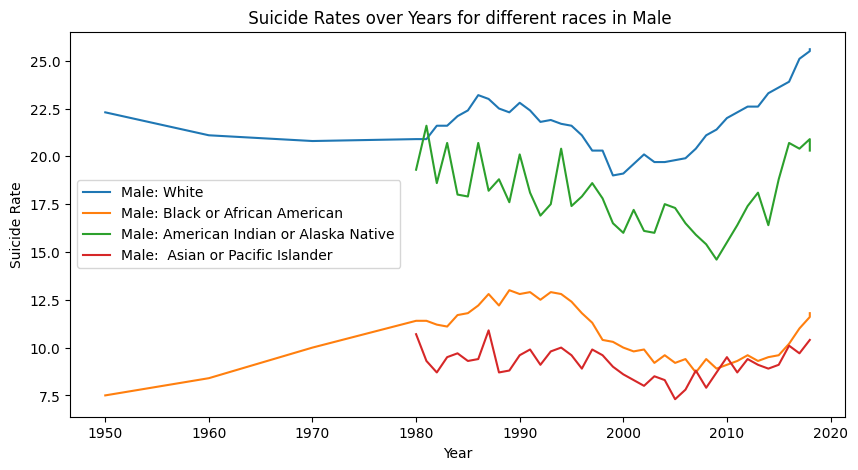

In [111]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(whitemale_suiciderate_allages['YEAR'], whitemale_suiciderate_allages['ESTIMATE'], label="Male: White")

plt.plot(blackmale_suiciderate_allages['YEAR'], blackmale_suiciderate_allages['ESTIMATE'], label="Male: Black or African American")

plt.plot(nativemale_suiciderate_allages['YEAR'], nativemale_suiciderate_allages['ESTIMATE'], label="Male: American Indian or Alaska Native")

plt.plot(asianmale_suiciderate_allages['YEAR'], asianmale_suiciderate_allages['ESTIMATE'], label="Male:  Asian or Pacific Islander")


plt.title(' Suicide Rates over Years for different races in Male')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')

# Adding a legend
plt.legend()

# Display the plot
plt.show()



In [102]:
whitefemale_suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Female: White"]#.ESTIMATE.plot()
whitefemale_suiciderate
whitefemalesuiciderate_1 = whitefemale_suiciderate[whitefemale_suiciderate.UNIT_NUM == 1]
whitefemalesuiciderate_1
whitefemale_suiciderate_allages = whitefemalesuiciderate_1[whitefemalesuiciderate_1.AGE == "All ages"]
whitefemale_suiciderate_allages

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,age_start,age_end
294,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: White,4.21,1950,1,All ages,0.0,6.0,NaN,0,120
295,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: White,4.21,1960,2,All ages,0.0,5.9,NaN,0,120
296,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: White,4.21,1970,3,All ages,0.0,7.9,NaN,0,120
297,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: White,4.21,1980,4,All ages,0.0,6.1,NaN,0,120
298,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: White,4.21,1981,5,All ages,0.0,6.4,NaN,0,120
299,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: White,4.21,1982,6,All ages,0.0,6.2,NaN,0,120
300,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: White,4.21,1983,7,All ages,0.0,6.0,NaN,0,120
301,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: White,4.21,1984,8,All ages,0.0,6.0,NaN,0,120
302,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: White,4.21,1985,9,All ages,0.0,5.7,NaN,0,120
303,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: White,4.21,1986,10,All ages,0.0,6.0,NaN,0,120


In [103]:
blackfemale_suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Female: Black or African American"]
blackfemalesuiciderate_1 = blackfemale_suiciderate[blackfemale_suiciderate.UNIT_NUM == 1]
blackfemalesuiciderate_1
blackfemale_suiciderate_allages =blackfemalesuiciderate_1[blackfemalesuiciderate_1.AGE == "All ages"]
blackfemale_suiciderate_allages

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,age_start,age_end
336,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Black or African American,4.22,1950,1,All ages,0.0,1.8,NaN,0,120
337,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Black or African American,4.22,1960,2,All ages,0.0,2.0,NaN,0,120
338,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Black or African American,4.22,1970,3,All ages,0.0,2.9,NaN,0,120
339,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Black or African American,4.22,1980,4,All ages,0.0,2.4,NaN,0,120
340,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Black or African American,4.22,1981,5,All ages,0.0,2.5,NaN,0,120
341,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Black or African American,4.22,1982,6,All ages,0.0,2.3,NaN,0,120
342,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Black or African American,4.22,1983,7,All ages,0.0,2.2,NaN,0,120
343,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Black or African American,4.22,1984,8,All ages,0.0,2.3,NaN,0,120
344,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Black or African American,4.22,1985,9,All ages,0.0,2.3,NaN,0,120
345,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Black or African American,4.22,1986,10,All ages,0.0,2.4,NaN,0,120


In [104]:
nativefemale_suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Female: American Indian or Alaska Native"]
nativefemalesuiciderate_1 = nativefemale_suiciderate[nativefemale_suiciderate.UNIT_NUM == 1]
nativefemalesuiciderate_1
nativefemale_suiciderate_allages =nativefemalesuiciderate_1[nativefemalesuiciderate_1.AGE == "All ages"]
nativefemale_suiciderate_allages

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,age_start,age_end
378,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: American Indian or Alaska Native,4.23,1950,1,All ages,0.0,NaN,...,0,120
379,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: American Indian or Alaska Native,4.23,1960,2,All ages,0.0,NaN,...,0,120
380,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: American Indian or Alaska Native,4.23,1970,3,All ages,0.0,NaN,...,0,120
381,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: American Indian or Alaska Native,4.23,1980,4,All ages,0.0,4.7,NaN,0,120
382,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: American Indian or Alaska Native,4.23,1981,5,All ages,0.0,4.1,NaN,0,120
383,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: American Indian or Alaska Native,4.23,1982,6,All ages,0.0,3.3,NaN,0,120
384,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: American Indian or Alaska Native,4.23,1983,7,All ages,0.0,4.0,NaN,0,120
385,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: American Indian or Alaska Native,4.23,1984,8,All ages,0.0,3.0,NaN,0,120
386,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: American Indian or Alaska Native,4.23,1985,9,All ages,0.0,4.1,NaN,0,120
387,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: American Indian or Alaska Native,4.23,1986,10,All ages,0.0,4.1,NaN,0,120


In [105]:
asianfemale_suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Female: Asian or Pacific Islander"]
asianfemalesuiciderate_1 = asianfemale_suiciderate[asianfemale_suiciderate.UNIT_NUM == 1]
asianfemalesuiciderate_1
asianfemale_suiciderate_allages =asianfemalesuiciderate_1[asianfemalesuiciderate_1.AGE == "All ages"]
asianfemale_suiciderate_allages

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,age_start,age_end
420,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Asian or Pacific Islander,4.24,1950,1,All ages,0.0,NaN,...,0,120
421,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Asian or Pacific Islander,4.24,1960,2,All ages,0.0,NaN,...,0,120
422,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Asian or Pacific Islander,4.24,1970,3,All ages,0.0,NaN,...,0,120
423,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Asian or Pacific Islander,4.24,1980,4,All ages,0.0,5.5,NaN,0,120
424,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Asian or Pacific Islander,4.24,1981,5,All ages,0.0,6.4,NaN,0,120
425,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Asian or Pacific Islander,4.24,1982,6,All ages,0.0,5.0,NaN,0,120
426,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Asian or Pacific Islander,4.24,1983,7,All ages,0.0,5.6,NaN,0,120
427,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Asian or Pacific Islander,4.24,1984,8,All ages,0.0,5.5,NaN,0,120
428,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Asian or Pacific Islander,4.24,1985,9,All ages,0.0,5.0,NaN,0,120
429,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Asian or Pacific Islander,4.24,1986,10,All ages,0.0,4.5,NaN,0,120


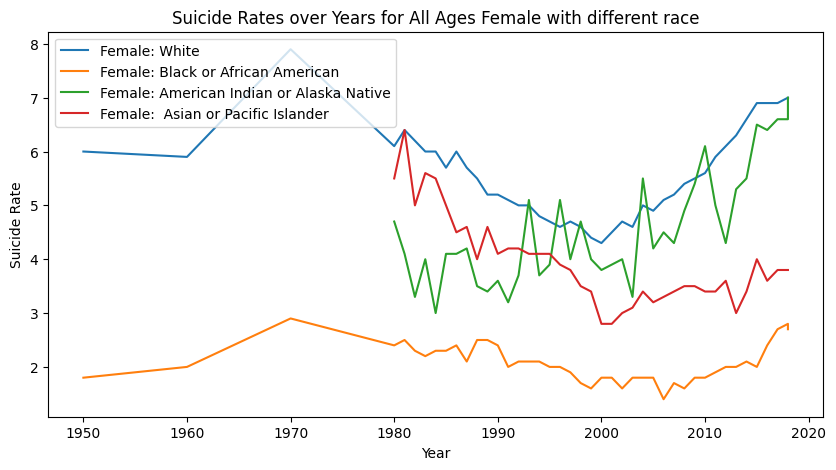

In [110]:
plt.figure()

plt.plot(whitefemale_suiciderate_allages['YEAR'], whitefemale_suiciderate_allages['ESTIMATE'], label="Female: White")

plt.plot(blackfemale_suiciderate_allages['YEAR'], blackfemale_suiciderate_allages['ESTIMATE'], label="Female: Black or African American")

plt.plot(nativefemale_suiciderate_allages['YEAR'], nativefemale_suiciderate_allages['ESTIMATE'], label="Female: American Indian or Alaska Native")

plt.plot(asianfemale_suiciderate_allages['YEAR'], asianfemale_suiciderate_allages['ESTIMATE'], label="Female:  Asian or Pacific Islander")


plt.title('Suicide Rates over Years for All Ages Female with different race')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [108]:
allpersons10_14suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "10-14 years"]#.ESTIMATE.plot()
allpersons10_14suiciderate
allpersons15_19suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "15-19 years"]#.ESTIMATE.plot()
allpersons15_19suiciderate
allpersons20_24suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "20-24 years"]#.ESTIMATE.plot()
allpersons20_24suiciderate
allpersons25_34suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "25-34 years"]#.ESTIMATE.plot()
allpersons25_34suiciderate
allpersons35_44suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "35-44 years"]#.ESTIMATE.plot()
allpersons35_44suiciderate
allpersons45_54suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "45-54 years"]#.ESTIMATE.plot()
allpersons45_54suiciderate
allpersons55_64suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "55-64 years"]#.ESTIMATE.plot()
allpersons55_64suiciderate
allpersons65_74suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "65-74 years"]#.ESTIMATE.plot()
allpersons65_74suiciderate
allpersons75_84suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "75-84 years"]#.ESTIMATE.plot()
allpersons75_84suiciderate




,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,age_start,age_end
1358,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,75-84 years,1.52,1950,1,75-84 years,5.2,31.1,NaN,75,84
1359,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,75-84 years,1.52,1960,2,75-84 years,5.2,27.9,NaN,75,84
1360,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,75-84 years,1.52,1970,3,75-84 years,5.2,21.2,NaN,75,84
1361,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,75-84 years,1.52,1980,4,75-84 years,5.2,19.1,NaN,75,84
1362,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,75-84 years,1.52,1981,5,75-84 years,5.2,18.6,NaN,75,84
1363,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,75-84 years,1.52,1982,6,75-84 years,5.2,20.5,NaN,75,84
1364,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,75-84 years,1.52,1983,7,75-84 years,5.2,22.2,NaN,75,84
1365,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,75-84 years,1.52,1984,8,75-84 years,5.2,21.9,NaN,75,84
1366,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,75-84 years,1.52,1985,9,75-84 years,5.2,23.9,NaN,75,84
1367,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,75-84 years,1.52,1986,10,75-84 years,5.2,25.0,NaN,75,84


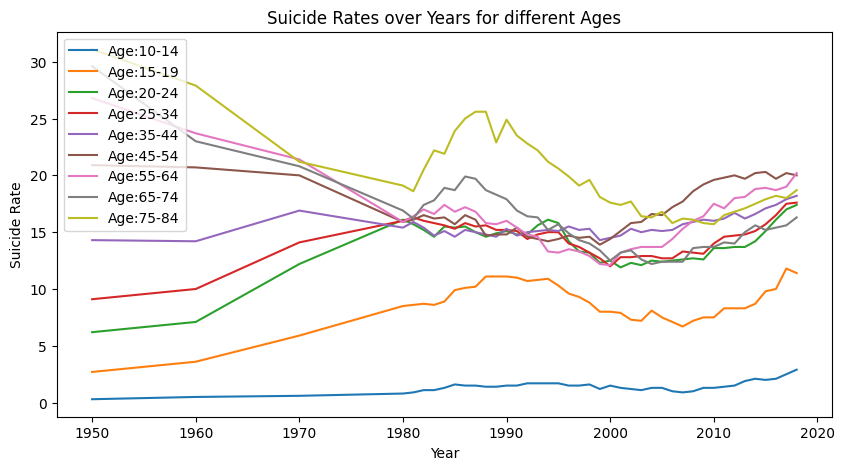

In [109]:
plt.figure()

plt.plot(allpersons10_14suiciderate['YEAR'], allpersons10_14suiciderate['ESTIMATE'], label="Age:10-14")

plt.plot(allpersons15_19suiciderate['YEAR'], allpersons15_19suiciderate['ESTIMATE'], label="Age:15-19")

plt.plot(allpersons20_24suiciderate['YEAR'], allpersons20_24suiciderate['ESTIMATE'], label="Age:20-24")

plt.plot(allpersons25_34suiciderate['YEAR'],allpersons25_34suiciderate['ESTIMATE'], label="Age:25-34")

plt.plot(allpersons35_44suiciderate['YEAR'],allpersons35_44suiciderate['ESTIMATE'], label="Age:35-44")

plt.plot(allpersons45_54suiciderate['YEAR'],allpersons45_54suiciderate['ESTIMATE'], label="Age:45-54")

plt.plot(allpersons55_64suiciderate['YEAR'],allpersons55_64suiciderate['ESTIMATE'], label="Age:55-64")

plt.plot(allpersons65_74suiciderate['YEAR'],allpersons65_74suiciderate['ESTIMATE'], label="Age:65-74")

plt.plot(allpersons75_84suiciderate['YEAR'],allpersons75_84suiciderate['ESTIMATE'], label="Age:75-84")


plt.title('Suicide Rates over Years for different Ages')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [115]:
male10_14suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Male: 10-14 years"]#.ESTIMATE.plot()
male10_14suiciderate
male15_19suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Male: 15-19 years"]#.ESTIMATE.plot()
male15_19suiciderate
male20_24suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Male: 20-24 years"]#.ESTIMATE.plot()
male20_24suiciderate
male25_34suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Male: 25-34 years"]#.ESTIMATE.plot()
male25_34suiciderate
male35_44suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Male: 35-44 years"]#.ESTIMATE.plot()
male35_44suiciderate
male45_54suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Male: 45-54 years"]#.ESTIMATE.plot()
male45_54suiciderate
male55_64suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Male: 55-64 years"]#.ESTIMATE.plot()
male55_64suiciderate
male65_74suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Male: 65-74 years"]#.ESTIMATE.plot()
male65_74suiciderate
male75_84suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Male: 75-84 years"]#.ESTIMATE.plot()
male75_84suiciderate


,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,age_start,age_end
2030,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Male: 75-84 years,3.152,1950,1,75-84 years,5.2,58.3,NaN,75,84
2031,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Male: 75-84 years,3.152,1960,2,75-84 years,5.2,52.5,NaN,75,84
2032,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Male: 75-84 years,3.152,1970,3,75-84 years,5.2,42.8,NaN,75,84
2033,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Male: 75-84 years,3.152,1980,4,75-84 years,5.2,42.3,NaN,75,84
2034,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Male: 75-84 years,3.152,1981,5,75-84 years,5.2,41.4,NaN,75,84
2035,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Male: 75-84 years,3.152,1982,6,75-84 years,5.2,45.3,NaN,75,84
2036,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Male: 75-84 years,3.152,1983,7,75-84 years,5.2,49.2,NaN,75,84
2037,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Male: 75-84 years,3.152,1984,8,75-84 years,5.2,48.5,NaN,75,84
2038,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Male: 75-84 years,3.152,1985,9,75-84 years,5.2,53.1,NaN,75,84
2039,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Male: 75-84 years,3.152,1986,10,75-84 years,5.2,54.9,NaN,75,84


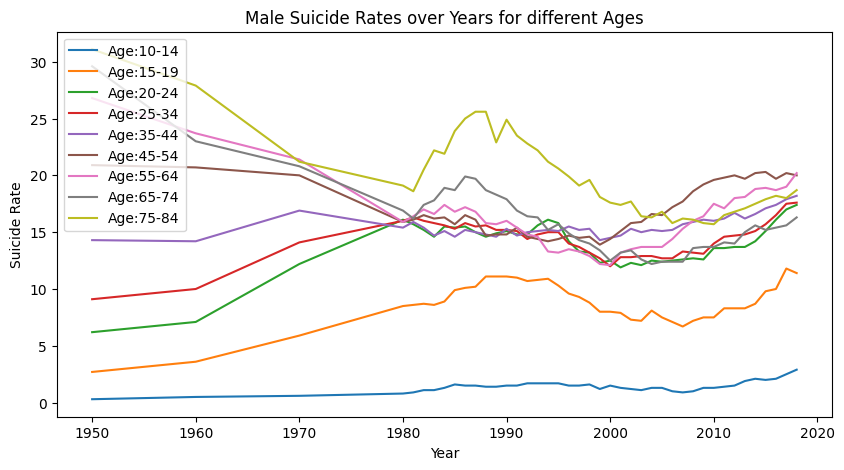

In [116]:
plt.figure()

plt.plot(male10_14suiciderate['YEAR'], allpersons10_14suiciderate['ESTIMATE'], label="Age:10-14")

plt.plot(male15_19suiciderate['YEAR'], allpersons15_19suiciderate['ESTIMATE'], label="Age:15-19")

plt.plot(male20_24suiciderate['YEAR'], allpersons20_24suiciderate['ESTIMATE'], label="Age:20-24")

plt.plot(male25_34suiciderate['YEAR'],allpersons25_34suiciderate['ESTIMATE'], label="Age:25-34")

plt.plot(male35_44suiciderate['YEAR'],allpersons35_44suiciderate['ESTIMATE'], label="Age:35-44")

plt.plot(male45_54suiciderate['YEAR'],allpersons45_54suiciderate['ESTIMATE'], label="Age:45-54")

plt.plot(male55_64suiciderate['YEAR'],allpersons55_64suiciderate['ESTIMATE'], label="Age:55-64")

plt.plot(male65_74suiciderate['YEAR'],allpersons65_74suiciderate['ESTIMATE'], label="Age:65-74")

plt.plot(male75_84suiciderate['YEAR'],allpersons75_84suiciderate['ESTIMATE'], label="Age:75-84")


plt.title('Male Suicide Rates over Years for different Ages')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [117]:
female10_14suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Female: 10-14 years"]#.ESTIMATE.plot()
female10_14suiciderate
female15_19suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Female: 15-19 years"]#.ESTIMATE.plot()
female15_19suiciderate
female20_24suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Female: 20-24 years"]#.ESTIMATE.plot()
female20_24suiciderate
female25_34suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Female: 25-34 years"]#.ESTIMATE.plot()
female25_34suiciderate
female35_44suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Female: 35-44 years"]#.ESTIMATE.plot()
female35_44suiciderate
female45_54suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Female: 45-54 years"]#.ESTIMATE.plot()
female45_54suiciderate
female55_64suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Female: 55-64 years"]#.ESTIMATE.plot()
female55_64suiciderate
female65_74suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Female: 65-74 years"]#.ESTIMATE.plot()
female65_74suiciderate
female75_84suiciderate = suiciderate_data[suiciderate_data.STUB_LABEL == "Female: 75-84 years"]#.ESTIMATE.plot()
female75_84suiciderate

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,age_start,age_end
2618,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3.252,1950,1,75-84 years,5.2,8.1,NaN,75,84
2619,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3.252,1960,2,75-84 years,5.2,8.9,NaN,75,84
2620,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3.252,1970,3,75-84 years,5.2,7.0,NaN,75,84
2621,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3.252,1980,4,75-84 years,5.2,5.5,NaN,75,84
2622,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3.252,1981,5,75-84 years,5.2,5.2,NaN,75,84
2623,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3.252,1982,6,75-84 years,5.2,5.8,NaN,75,84
2624,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3.252,1983,7,75-84 years,5.2,6.3,NaN,75,84
2625,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3.252,1984,8,75-84 years,5.2,6.3,NaN,75,84
2626,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3.252,1985,9,75-84 years,5.2,6.7,NaN,75,84
2627,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3.252,1986,10,75-84 years,5.2,7.4,NaN,75,84


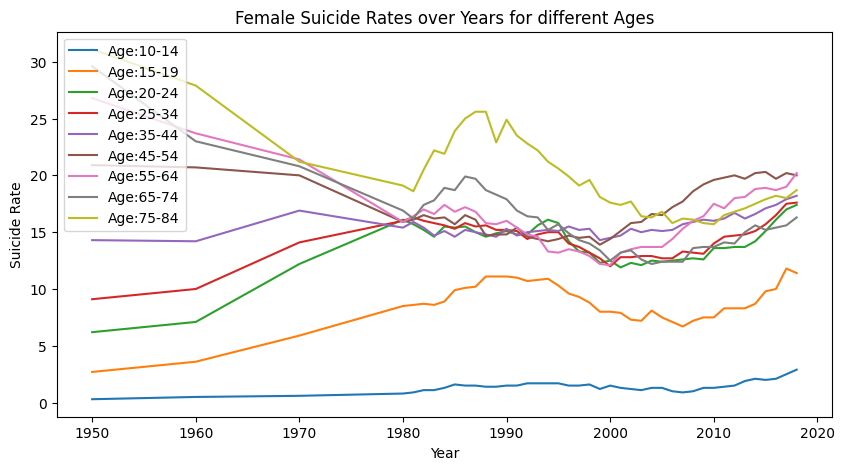

In [118]:
plt.figure()

plt.plot(female10_14suiciderate['YEAR'], allpersons10_14suiciderate['ESTIMATE'], label="Age:10-14")

plt.plot(female15_19suiciderate['YEAR'], allpersons15_19suiciderate['ESTIMATE'], label="Age:15-19")

plt.plot(female20_24suiciderate['YEAR'], allpersons20_24suiciderate['ESTIMATE'], label="Age:20-24")

plt.plot(female25_34suiciderate['YEAR'],allpersons25_34suiciderate['ESTIMATE'], label="Age:25-34")

plt.plot(female35_44suiciderate['YEAR'],allpersons35_44suiciderate['ESTIMATE'], label="Age:35-44")

plt.plot(female45_54suiciderate['YEAR'],allpersons45_54suiciderate['ESTIMATE'], label="Age:45-54")

plt.plot(female55_64suiciderate['YEAR'],allpersons55_64suiciderate['ESTIMATE'], label="Age:55-64")

plt.plot(female65_74suiciderate['YEAR'],allpersons65_74suiciderate['ESTIMATE'], label="Age:65-74")

plt.plot(female75_84suiciderate['YEAR'],allpersons75_84suiciderate['ESTIMATE'], label="Age:75-84")


plt.title('Female Suicide Rates over Years for different Ages')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')

# Adding a legend
plt.legend()

In [121]:
jupyter notebook



SyntaxError: invalid syntax (2742849633.py, line 1)